# Introduction
- description problème de recherche
- hypothèse de recherche

In [1]:
library(cowplot)
library(gclus);
library(utils);library(plyr);library(fitdistrplus)

#library(xgboost);
library(Metrics)
slibrary(ggfortify);
library(gridExtra);library(stats);
library(kableExtra)
library(MASS); library(knitr);library(ggplot2)
library(cowplot);library(reshape2);library(dplyr)
library(GGally);library(corrplot);library(carData)
library(car);library(questionr);library(multcomp)
library(dplyr);library(leaps);library(tinytex);library(latexpdf);
library(rmarkdown);library(markdown);library(TeachingDemos)
library(e1071);library(tidyverse);library(fitdistrplus);library(lmtest); library(randomForest);library(caret)

Warning message:
"package 'cowplot' was built under R version 3.6.3"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: cluster
Warning message:
"package 'fitdistrplus' was built under R version 3.6.3"Loading required package: MASS
Loading required package: survival


ERROR: Error in slibrary(ggfortify): impossible de trouver la fonction "slibrary"


In [2]:
df_train = read.csv("./data/Train.csv",header=TRUE)
df_test = read.csv("./data/Test.csv",header=TRUE)

names(df_train)

[1] "MSSubClass"    "MSZoning"      "LotFrontage"   "LotArea"      
 [5] "Street"        "LotShape"      "LandContour"   "Utilities"    
 [9] "LotConfig"     "LandSlope"     "Neighborhood"  "Condition1"   
[13] "Condition2"    "BldgType"      "HouseStyle"    "OverallQual"  
[17] "OverallCond"   "YearBuilt"     "YearRemodAdd"  "RoofStyle"    
[21] "RoofMatl"      "Exterior1st"   "Exterior2nd"   "MasVnrType"   
[25] "MasVnrArea"    "ExterQual"     "ExterCond"     "Foundation"   
[29] "BsmtQual"      "BsmtCond"      "BsmtExposure"  "BsmtFinType1" 
[33] "BsmtFinSF1"    "BsmtFinType2"  "BsmtFinSF2"    "BsmtUnfSF"    
[37] "TotalBsmtSF"   "Heating"       "HeatingQC"     "CentralAir"   
[41] "Electrical"    "X1stFlrSF"     "X2ndFlrSF"     "LowQualFinSF" 
[45] "GrLivArea"     "BsmtFullBath"  "BsmtHalfBath"  "FullBath"     
[49] "HalfBath"      "BedroomAbvGr"  "KitchenAbvGr"  "KitchenQual"  
[53] "TotRmsAbvGrd"  "Functional"    "Fireplaces"    "GarageType"   
[57] "GarageYrBlt"   "GarageFinish"  "GarageCars"    "GarageArea"   
[61] "GarageQual"    "GarageCond"    "PavedDrive"    "WoodDeckSF"   
[65] "OpenPorchSF"   "EnclosedPorch" "X3SsnPorch"    "ScreenPorch"  
[69] "PoolArea"      "MiscVal"       "MoSold"        "YrSold"       
[73] "SaleType"      "SaleCondition" "SalePrice"

In [3]:
df_all <- rbind(df_train, df_test)

dim(df_train)
dim(df_test)
dim(df_all)

[1] 1095   75

[1] 365  75

[1] 1460   75

In [4]:
head(df_train)

MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
60,RL,63,7875,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2006,WD,Normal,180000
190,RL,62,10106,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,127500
20,RL,90,17217,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2006,WD,Abnorml,84500
90,RL,92,12108,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,118000
20,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,12,2007,WD,Normal,179000
50,RL,86,11500,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,322,0,0,6,2006,WD,Normal,250000


In [5]:
# affiche les 10 premières features et la target
str(df_train[,c(1:10, 75)])

'data.frame':	1095 obs. of  11 variables:
 $ MSSubClass : int  60 190 20 90 20 50 90 20 60 20 ...
 $ MSZoning   : Factor w/ 5 levels "C (all)","FV",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ LotFrontage: int  63 62 90 92 65 86 75 71 74 63 ...
 $ LotArea    : int  7875 10106 17217 12108 8450 11500 9825 9230 7472 8487 ...
 $ Street     : Factor w/ 2 levels "Grvl","Pave": 2 2 2 2 2 2 2 2 2 2 ...
 $ LotShape   : Factor w/ 4 levels "IR1","IR2","IR3",..: 4 4 4 4 4 1 4 4 1 4 ...
 $ LandContour: Factor w/ 4 levels "Bnk","HLS","Low",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Utilities  : Factor w/ 2 levels "AllPub","NoSeWa": 1 1 1 1 1 1 1 1 1 1 ...
 $ LotConfig  : Factor w/ 5 levels "Corner","CulDSac",..: 5 5 5 5 5 5 5 1 2 3 ...
 $ LandSlope  : Factor w/ 3 levels "Gtl","Mod","Sev": 1 1 1 1 1 1 1 1 1 1 ...
 $ SalePrice  : int  180000 127500 84500 118000 179000 250000 100000 146000 184000 190000 ...


In [6]:
nrow(df_train) - nrow(unique(df_train))
nrow(df_test) - nrow(unique(df_test))

[1] 0

[1] 0

In [7]:
sum(is.na(df_train)) 
sum(is.na(df_test))

[1] 0

[1] 0

---
# Analyse exploratoire
- graphes statistiques élémentaires pour les variables et paires de variables
- Cullen-Frey pour l’étude de la distribution de la variable cible.
- Décrivez vos résultats

summary statistics
------
min:  34900   max:  755000 
median:  163000 
mean:  180921.2 
estimated sd:  79442.5 
estimated skewness:  1.882876 
estimated kurtosis:  9.536282 

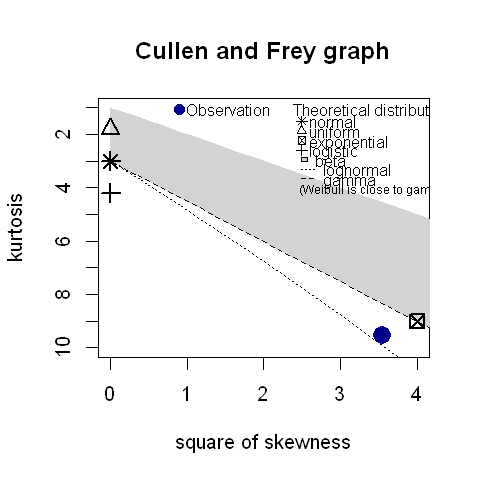

summary statistics
------
min:  10.46024   max:  13.53447 
median:  12.00151 
mean:  12.02405 
estimated sd:  0.3994519 
estimated skewness:  0.1213351 
estimated kurtosis:  3.809532 

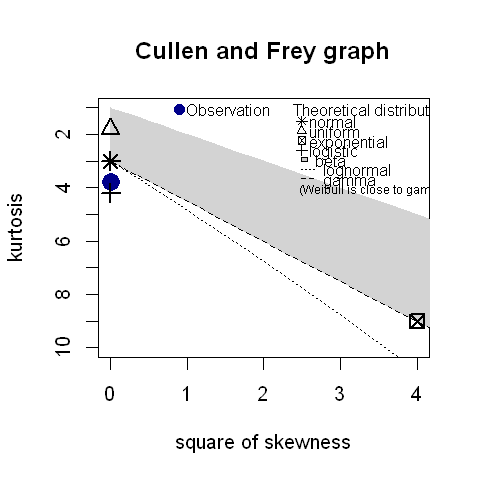

In [13]:
options(repr.plot.width = 4, repr.plot.height = 4)

descdist(df_all$SalePrice)
descdist(log(df_all$SalePrice))

La target est décalée vers la gauche (skewed), ceci pourrait s'expliquer par le fait que les prix les plus élevés ne sont pas abordables pour la plupart des gens

In [14]:
options(repr.plot.width = 6, repr.plot.height = 3)

ggplot(data = df_all[!is.na(df_all$SalePrice),], aes(x=SalePrice)) +
        geom_histogram(bins=100, fill="blue", aes(y = ..density..)) +
        geom_density() + labs(subtitle="Title")

ggplot(data=df_all[!is.na(df_all$SalePrice),], aes(x=log(SalePrice))) +
        geom_histogram(bins=100, fill="blue", aes(y = ..density..)) +
        geom_density() + labs(subtitle="blue")

ERROR: Error in ggplot(data = df_all[!is.na(df_all$SalePrice), ], aes(x = SalePrice)): impossible de trouver la fonction "ggplot"


In [15]:
ggplot(data = df_all[!is.na(df_all$SalePrice),], aes(x=factor(OverallQual), y=SalePrice))+
        geom_boxplot(col='blue') + labs(subtitle="Title")

ERROR: Error in ggplot(data = df_all[!is.na(df_all$SalePrice), ], aes(x = factor(OverallQual), : impossible de trouver la fonction "ggplot"


## Les features les plus importantes
regardons dans un 1er temps les features numériques qui sont les plus fortement corrélées avec la target pour voir qu'elles sont celles qui ont le plus d'influcence.

Il y a 19 features numériques sur les 37 dont la corrélation est en valeur absolue supérieure à 0.3. Il est à noter que toute les corrélations sont positives car tous les chiffres sont positifs.

In [23]:
# index des vecteur de variables numériques
numericVars <- which(sapply(df_all, is.numeric))

# liste des noms correspondants à ces vecteurs
numericVarNames <- names(numericVars) 

# nombre
length(numericVars)

[1] 37

In [24]:
all_numVar <- df_all[, numericVars]

# correlations de toutes les features numériques
cor_numVar <- cor(all_numVar, use="pairwise.complete.obs") 

options(repr.plot.width = 18, repr.plot.height = 9)

# classement decroissant des corrélations avec la target
cor_sorted <- as.matrix(sort(cor_numVar[,'SalePrice'], decreasing = TRUE))

# filtre pour ne garder que les corrélations supérieurs en val. abs. à 0.3
CorHigh <- names(which(apply(cor_sorted, 1, function(x) (x > 0.3 | x < -0.3))))
cor_numVar <- cor_numVar[CorHigh, CorHigh]

# affiche le graphe
corrplot.mixed(cor_numVar, tl.col="black", tl.pos = "lt")

ERROR: Error in corrplot.mixed(cor_numVar, tl.col = "black", tl.pos = "lt"): impossible de trouver la fonction "corrplot.mixed"


---
# Validité des modèles

## baseline

In [18]:
lm_model_baseline <- lm(SalePrice ~ ., data=df_train)
summary(lm_model_baseline)


Call:
lm(formula = SalePrice ~ ., data = df_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-165711   -8873     196    9717  165711 

Coefficients: (3 not defined because of singularities)
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -4.508e+05  1.238e+06  -0.364 0.715798    
MSSubClass           -7.243e+01  9.586e+01  -0.756 0.450098    
MSZoningFV            2.728e+04  1.559e+04   1.749 0.080571 .  
MSZoningRH            1.325e+04  1.592e+04   0.832 0.405450    
MSZoningRL            2.088e+04  1.389e+04   1.504 0.133060    
MSZoningRM            1.541e+04  1.306e+04   1.180 0.238133    
LotFrontage           2.319e+01  5.450e+01   0.425 0.670592    
LotArea               7.337e-01  1.357e-01   5.407 8.30e-08 ***
StreetPave            2.735e+04  1.370e+04   1.997 0.046178 *  
LotShapeIR2           5.607e+03  5.099e+03   1.100 0.271844    
LotShapeIR3          -1.196e+03  1.108e+04  -0.108 0.914052    
LotShapeReg           3.228e+0

In [22]:
names(df_train)

[1] "MSSubClass"    "MSZoning"      "LotFrontage"   "LotArea"      
 [5] "Street"        "LotShape"      "LandContour"   "Utilities"    
 [9] "LotConfig"     "LandSlope"     "Neighborhood"  "Condition1"   
[13] "Condition2"    "BldgType"      "HouseStyle"    "OverallQual"  
[17] "OverallCond"   "YearBuilt"     "YearRemodAdd"  "RoofStyle"    
[21] "RoofMatl"      "Exterior1st"   "Exterior2nd"   "MasVnrType"   
[25] "MasVnrArea"    "ExterQual"     "ExterCond"     "Foundation"   
[29] "BsmtQual"      "BsmtCond"      "BsmtExposure"  "BsmtFinType1" 
[33] "BsmtFinSF1"    "BsmtFinType2"  "BsmtFinSF2"    "BsmtUnfSF"    
[37] "TotalBsmtSF"   "Heating"       "HeatingQC"     "CentralAir"   
[41] "Electrical"    "X1stFlrSF"     "X2ndFlrSF"     "LowQualFinSF" 
[45] "GrLivArea"     "BsmtFullBath"  "BsmtHalfBath"  "FullBath"     
[49] "HalfBath"      "BedroomAbvGr"  "KitchenAbvGr"  "KitchenQual"  
[53] "TotRmsAbvGrd"  "Functional"    "Fireplaces"    "GarageType"   
[57] "GarageYrBlt"   "GarageFinish"  "GarageCars"    "GarageArea"   
[61] "GarageQual"    "GarageCond"    "PavedDrive"    "WoodDeckSF"   
[65] "OpenPorchSF"   "EnclosedPorch" "X3SsnPorch"    "ScreenPorch"  
[69] "PoolArea"      "MiscVal"       "MoSold"        "YrSold"       
[73] "SaleType"      "SaleCondition" "SalePrice"

In [27]:
names(df_train[,-c(75)])

[1] "MSSubClass"    "MSZoning"      "LotFrontage"   "LotArea"      
 [5] "Street"        "LotShape"      "LandContour"   "Utilities"    
 [9] "LotConfig"     "LandSlope"     "Neighborhood"  "Condition1"   
[13] "Condition2"    "BldgType"      "HouseStyle"    "OverallQual"  
[17] "OverallCond"   "YearBuilt"     "YearRemodAdd"  "RoofStyle"    
[21] "RoofMatl"      "Exterior1st"   "Exterior2nd"   "MasVnrType"   
[25] "MasVnrArea"    "ExterQual"     "ExterCond"     "Foundation"   
[29] "BsmtQual"      "BsmtCond"      "BsmtExposure"  "BsmtFinType1" 
[33] "BsmtFinSF1"    "BsmtFinType2"  "BsmtFinSF2"    "BsmtUnfSF"    
[37] "TotalBsmtSF"   "Heating"       "HeatingQC"     "CentralAir"   
[41] "Electrical"    "X1stFlrSF"     "X2ndFlrSF"     "LowQualFinSF" 
[45] "GrLivArea"     "BsmtFullBath"  "BsmtHalfBath"  "FullBath"     
[49] "HalfBath"      "BedroomAbvGr"  "KitchenAbvGr"  "KitchenQual"  
[53] "TotRmsAbvGrd"  "Functional"    "Fireplaces"    "GarageType"   
[57] "GarageYrBlt"   "GarageFinish"  "GarageCars"    "GarageArea"   
[61] "GarageQual"    "GarageCond"    "PavedDrive"    "WoodDeckSF"   
[65] "OpenPorchSF"   "EnclosedPorch" "X3SsnPorch"    "ScreenPorch"  
[69] "PoolArea"      "MiscVal"       "MoSold"        "YrSold"       
[73] "SaleType"      "SaleCondition"

In [31]:
predict(lm_model_baseline, newdata=df_train[,-c(75)])

Warning message in predict.lm(lm_model_baseline, newdata = df_train[, -c(75)]):
"prediction from a rank-deficient fit may be misleading"

1         2         3         4         5         6         7         8 
175422.16  95028.13 124149.32  94308.45 185743.87 236689.79 100000.00 170115.76 
        9        10        11        12        13        14        15        16 
185169.80 190631.68 242438.44 260902.80  86160.75 116795.67 152886.31 179851.16 
       17        18        19        20        21        22        23        24 
132413.53 184322.40 503954.32 194323.98 183765.36  51416.47  82713.43 308297.73 
       25        26        27        28        29        30        31        32 
119080.04 104358.64 193978.00  85950.64 175083.56 130610.56 113344.29 138501.08 
       33        34        35        36        37        38        39        40 
360033.91 123555.97 286042.16 205509.15 141311.41 181265.41 105998.15 281242.52 
       41        42        43        44        45        46        47        48 
116545.34 211756.80  94408.44 395406.69 128762.72 268706.95 225780.64 221981.79 
       49        50        51        52        53        54        55        56 
164713.20 170692.40 133410.82  56652.89 217717.02 205023.37  91019.87 125014.29 
       57        58        59        60        61        62        63        64 
107469.56 111264.99  79314.97 155984.88 130828.82 182155.55  95010.33 107145.03 
       65        66        67        68        69        70        71        72 
112478.15 121932.69 104532.04 143519.34 136905.00  85395.45 148086.63 140353.61 
       73        74        75        76        77        78        79        80 
150737.18 205814.32 228654.46  96527.75 193373.74 160377.21 210650.08 186200.69 
       81        82        83        84        85        86        87        88 
196230.46 156686.29 290849.81 196504.00 105605.04 203745.02 215505.33 340126.41 
       89        90        91        92        93        94        95        96 
142404.07 196714.21  67723.81  91307.64 194354.99 258406.21 167015.89 242413.55 
       97        98        99       100       101       102       103       104 
160978.30 154416.80 188935.11 142745.45 281362.13 199122.68  96959.94 171564.64 
      105       106       107       108       109       110       111       112 
135154.30 284664.74 198183.90 234243.51 295625.37 260000.00 233851.65 254894.95 
      113       114       115       116       117       118       119       120 
257696.85 355584.88 117845.41 159126.67 131773.70 136283.65 137429.95 358998.35 
      121       122       123       124       125       126       127       128 
128348.86 136607.22 317515.11 168933.79 236737.04 143800.84 157215.34 184039.93 
      129       130       131       132       133       134       135       136 
178472.00 175146.53 207117.80 200422.83 230835.45 169435.82 172860.33  98387.93 
      137       138       139       140       141       142       143       144 
 86681.56 299655.87 240120.34 170677.65 146687.36 121554.83 113701.14 119803.47 
      145       146       147       148       149       150       151       152 
159849.74 234551.21 223418.71 143648.41 294847.35 135233.27 139128.86  96007.55 
      153       154       155       156       157       158       159       160 
156414.23 196824.39 161803.06 296221.51 174401.73 138991.26 105134.73 114734.81 
      161       162       163       164       165       166       167       168 
111110.58 120283.43 180104.95 135592.62 235000.00 194977.87 147382.16 191274.45 
      169       170       171       172       173       174       175       176 
203456.87 110606.62 153528.43 191895.08  77036.42 284627.26  99302.97 468111.46 
      177       178       179       180       181       182       183       184 
103710.22 115667.67 130513.79 130315.70 211290.08 238611.91 150053.38 130223.72 
      185       186       187       188       189       190       191       192 
321344.81 121700.62 236523.81 181936.81 195896.03 200048.00  99469.09 102866.34 
      193       194       195       196       197       198       199       200 
234850.35 163378.67 121059.96 140921.84

In [36]:
class(predict(lm_model_baseline, newdata=df_train[,-c(75)]))

Warning message in predict.lm(lm_model_baseline, newdata = df_train[, -c(75)]):
"prediction from a rank-deficient fit may be misleading"

[1] "numeric"

In [34]:
y_train_true = df_train$SalePrice
length(y_train_true)

[1] 1095

In [37]:
class(y_train_true)

[1] "integer"

In [35]:
c(sqrt(mean(y_train_pred-y_train_true)^2))

[1] 3.650415e-10

In [30]:
y_train_pred = predict(lm_model_baseline, newdata=df_train[,-c(75)])
y_train_true = df_train$SalePrice

y_test_pred = predict(lm_model_baseline, newdata=df_test[,-c(75)])
y_test_true = df_test$SalePrice

RMSE_train = c(sqrt(mean(y_train_pred-y_train_true)^2))
RMSE_train

RMSE_test = c(sqrt(mean(y_test_pred-y_test_true)^2))
RMSE_test

Warning message in predict.lm(lm_model_baseline, newdata = df_train[, -c(75)]):
"prediction from a rank-deficient fit may be misleading"

ERROR: Error in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$xlevels): factor Condition2 has new levels PosA, RRAe


In [ ]:
Yhat_train=(predict(modFF,newdata=trainB))
Y_train=sqrt(trainB$RentCount)

Yhat_test=(predict(modFF,newdata=test))
Y_test=sqrt(test$RentCount)

MSE_train=c(sqrt(mean(Y_train-Yhat_train)^2))
MSE_train

In [ ]:
MSE_test=c(sqrt(mean(Y_test-Yhat_test)^2))
MSE_test

## target modifié (log)

In [19]:
lm_model_log <- lm(log(SalePrice) ~ ., data=df_train)
summary(lm_model_log)


Call:
lm(formula = log(SalePrice) ~ ., data = df_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.66251 -0.04444  0.00396  0.04776  0.64279 

Coefficients: (3 not defined because of singularities)
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           9.212e+00  5.687e+00   1.620 0.105639    
MSSubClass           -3.592e-04  4.405e-04  -0.815 0.415044    
MSZoningFV            3.632e-01  7.165e-02   5.068 4.90e-07 ***
MSZoningRH            3.041e-01  7.316e-02   4.156 3.55e-05 ***
MSZoningRL            3.273e-01  6.380e-02   5.131 3.56e-07 ***
MSZoningRM            2.769e-01  5.999e-02   4.615 4.51e-06 ***
LotFrontage           1.357e-04  2.504e-04   0.542 0.588148    
LotArea               2.515e-06  6.235e-07   4.034 5.97e-05 ***
StreetPave            1.146e-01  6.294e-02   1.821 0.068922 .  
LotShapeIR2           2.784e-02  2.343e-02   1.188 0.235001    
LotShapeIR3           4.720e-03  5.092e-02   0.093 0.926164    
LotShapeReg    

## selection de features


In [25]:
lm_model_selection <- lm(SalePrice ~ MSSubClass + LotArea + BsmtUnfSF +
                    X1stFlrSF + X2ndFlrSF + GarageCars+
                    WoodDeckSF + ExterCond, data=df_train)
summary(lm_model_selection)


Call:
lm(formula = SalePrice ~ MSSubClass + LotArea + BsmtUnfSF + X1stFlrSF + 
    X2ndFlrSF + GarageCars + WoodDeckSF + ExterCond, data = df_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-429264  -20145    -842   19014  288980 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.180e+04  3.195e+04   0.682  0.49516    
MSSubClass  -8.277e+01  3.560e+01  -2.325  0.02026 *  
LotArea      1.248e-01  1.326e-01   0.941  0.34679    
BsmtUnfSF   -8.698e+00  3.302e+00  -2.634  0.00856 ** 
X1stFlrSF    9.763e+01  4.425e+00  22.065  < 2e-16 ***
X2ndFlrSF    6.294e+01  3.551e+00  17.725  < 2e-16 ***
GarageCars   3.627e+04  2.191e+03  16.552  < 2e-16 ***
WoodDeckSF   7.267e+01  1.174e+01   6.187 8.68e-10 ***
ExterCondFa -5.484e+04  3.319e+04  -1.652  0.09879 .  
ExterCondGd -4.121e+04  3.207e+04  -1.285  0.19917    
ExterCondPo -8.377e+04  5.516e+04  -1.519  0.12916    
ExterCondTA -3.745e+04  3.183e+04  -1.177  0.23965    
---
Signif. codes:  0 '***

## imputation des valeurs nulles - sans objet (pas de na)

---
# Modèles finale et comparaison des RMSE

---
# Discussion
- ouverture à d'autres modèles tree-based & ensembliste, NN
- ici si besoin d'explicabilité reg lin intéressante mais nécessite plus de feat eng.
- pour améliorer: plus de data, plus de feat eng., comparer de nouveaux modèles...